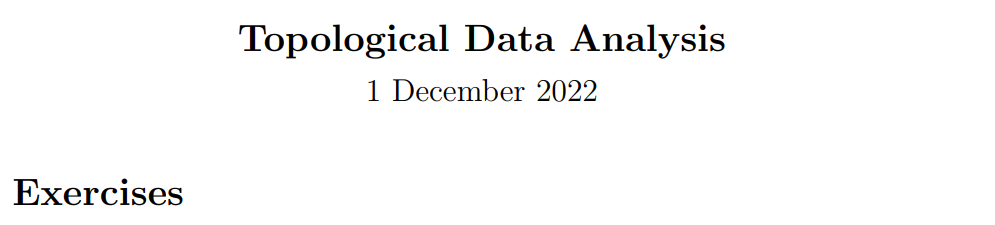

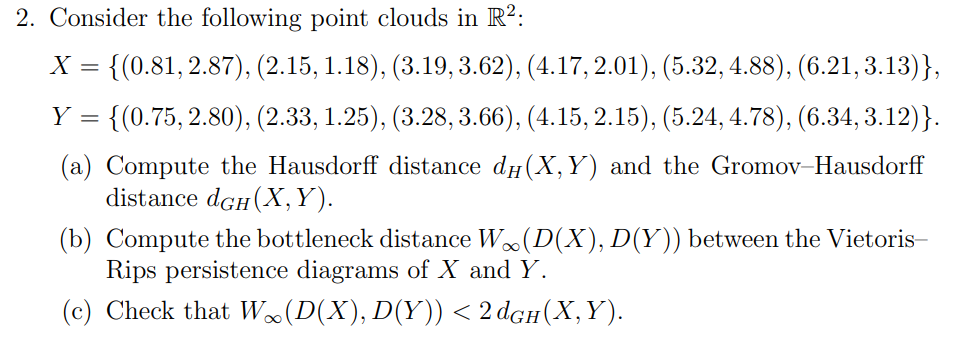

# Initialization

In [31]:
!pip install cython
!pip install ripser
!pip install gudhi

import numpy as np
import matplotlib.pyplot as plt
import gudhi
from ripser import ripser
import persim
from persim import plot_diagrams
from scipy.spatial.distance import directed_hausdorff as hausdorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercise 2

## Define and visualize the point cloud $X$ in $\mathbb{R}^{2}$

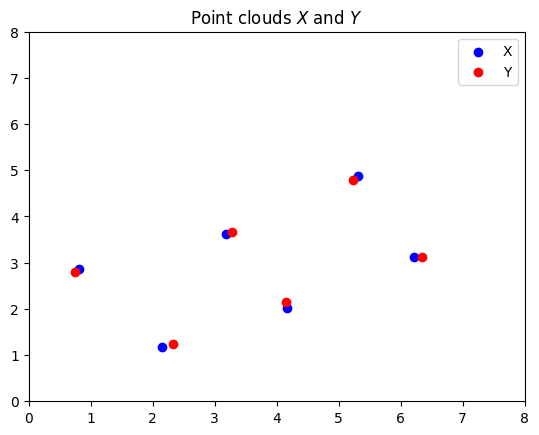

In [32]:
X = np.array([[0.81,2.87], [2.15,1.18], [3.19,3.62], [4.17,2.01], [5.32,4.88], [6.21,3.13]])       # Define the point cloud X
Y = np.array([[0.75,2.80], [2.33,1.25], [3.28,3.66], [4.15,2.15], [5.24,4.78], [6.34,3.12]])       # Define the point cloud y


plt.figure
plt.scatter(X[:,0], X[:,1], c="b", label='X')             # Plot the point cloud X
plt.scatter(Y[:,0], Y[:,1], c="r", label='Y')             # Plot the point cloud Y
plt.title("Point clouds $X$ and $Y$")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend()
plt.show()

## (a) Compute the Hausdorff distance and the Gromov-Hausdorff distance

We can use the function scipy.spatial.distance.directed_hausdorff to compute the Hausdorff distance between the point clouds X and Y

In [33]:
d_H = hausdorff(X, Y)[0]
print("The Hausdorff distance between X and Y is; ", d_H)

The Hausdorff distance between X and Y is;  0.19313207915827985


In [34]:
def Gromov_Hausdroff(X, Y):  
  def f(x, y):
    return np.array([x, y])

  d_GH = hausdorff(X, Y)[0]      # Initialize the minimum distance
  k_min = 0       # Initialize the value of k optimal

  f_X = np.zeros([X.shape[0], 2])
  for i in range(0, X.shape[0]):
    f_X[i] = f(X[i,0], X[i,1])

  g_Y = np.zeros([Y.shape[0], 2])
  for k in np.arange(-1, 1.0001, 0.0001):     # Find the value of k for which the distance is minimum
    def g(x, y):
      return np.array([x-k, y-k])
    for i in range(0, Y.shape[0]):
      g_Y[i] = g(Y[i,0], Y[i,1])

    if hausdorff(f_X, g_Y)[0]<d_GH:
      d_GH = hausdorff(f_X, g_Y)[0]
      k_min = k

  def g(x, y):
      return np.array([x-k_min, y-k_min])
  for i in range(0, Y.shape[0]):
      g_Y[i] = g(Y[i,0], Y[i,1])

  return d_GH, f_X, g_Y

In [35]:
d_GH, f_X, g_Y = Gromov_Hausdroff(X, Y)

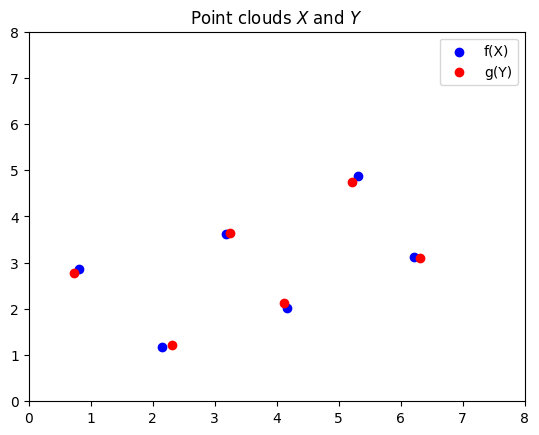

In [36]:
# Visualize the results --------------------------------------------------------
plt.figure
plt.scatter(f_X[:,0], f_X[:,1], c="b", label='f(X)')             # Plot the point cloud X
plt.scatter(g_Y[:,0], g_Y[:,1], c="r", label='g(Y)')             # Plot the point cloud Y
plt.title("Point clouds $X$ and $Y$")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend()
plt.show()

In [37]:
d_GH = hausdorff(f_X, g_Y)[0]
print("The Hausdorff distance between X and Y is; ", d_H)
print("The Gromov-Hausdorff distance between X and Y is; ", d_GH)

The Hausdorff distance between X and Y is;  0.19313207915827985
The Gromov-Hausdorff distance between X and Y is;  0.16226823472277446


## (b) Compute the bottleneck distance

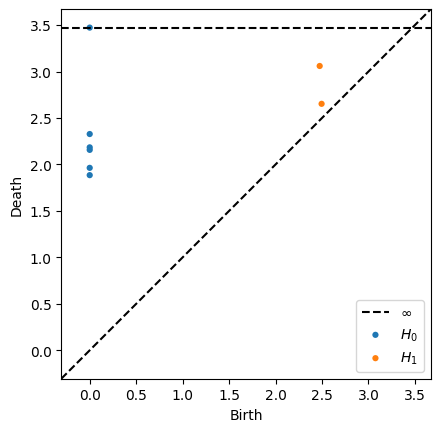

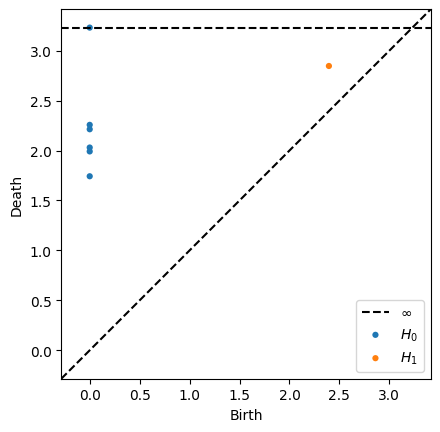

In [38]:
X_rips_complex = gudhi.RipsComplex(points=X, max_edge_length=5)
Y_rips_complex = gudhi.RipsComplex(points=Y, max_edge_length=5)
X_diagram = ripser(X)['dgms']
Y_diagram = ripser(Y)['dgms']

plot_diagrams(X_diagram, show=True)
plot_diagrams(Y_diagram, show=True)

In [39]:
bottleneck_d = gudhi.bottleneck_distance(X_diagram[0], Y_diagram[0])
print("The bottleneck distance is: ", bottleneck_d)

The bottleneck distance is:  0.14210867881774902


## (c) Check the Stability theorem inequality

In [40]:
print("Is the bottleneck distance smaller than twice the Gromov-Hausdorff distance? ", bottleneck_d<=2*d_GH)

Is the bottleneck distance smaller than twice the Gromov-Hausdorff distance?  True
